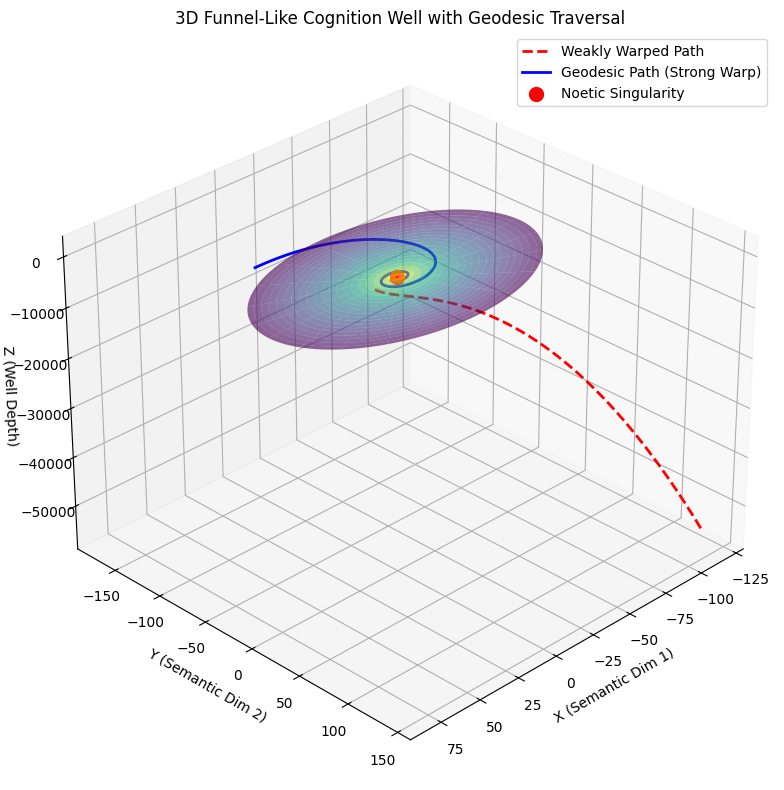

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Geodesic equations for improved 3D spiral (with phi for full azimuthal motion)
def geodesic_eqs(y, t, M):
    r, dr, theta, dtheta, phi, dphi = y
    # Simplified second derivatives for Schwarzschild-like metric
    d2r = - (1.5 * M / r**2) * dr**2 + r * (dtheta**2 + np.sin(theta)**2 * dphi**2) * (1 - 2*M/r)**2
    d2theta = - (2 / r) * dr * dtheta
    d2phi = - (2 / r) * dr * dphi + (2 * dtheta * dphi * np.cos(theta)) / np.sin(theta) if np.sin(theta) != 0 else 0
    return [dr, d2r, dtheta, d2theta, dphi, d2phi]

M_strong = 5.0
y0_strong = [20.0, -0.1, np.pi/16, 0.01, 0.0, 0.15]  # Tighter spiral
t = np.linspace(0, 150, 500)  # Extended time for better convergence
sol_strong = odeint(geodesic_eqs, y0_strong, t, args=(M_strong,))
r_strong, theta_strong, phi_strong = sol_strong[:,0], sol_strong[:,2], sol_strong[:,4]
x_strong = r_strong * np.sin(theta_strong) * np.cos(phi_strong)
y_strong = r_strong * np.sin(theta_strong) * np.sin(phi_strong)
z_strong = - (r_strong**2 / (2 * M_strong)) + 20  # Descent to z=0

# Weak curvature (less influenced path)
M_weak = 0.5
y0_weak = [20.0, -0.05, np.pi/4, 0.005, 0.0, 0.1]  # Slower descent, looser spiral
sol_weak = odeint(geodesic_eqs, y0_weak, t, args=(M_weak,))
r_weak, theta_weak, phi_weak = sol_weak[:,0], sol_weak[:,2], sol_weak[:,4]
x_weak = r_weak * np.sin(theta_weak) * np.cos(phi_weak)
y_weak = r_weak * np.sin(theta_weak) * np.sin(phi_weak)
z_weak = - (r_weak**2 / (2 * M_weak)) + 20  # Shallower descent, ends higher

# Create improved funnel-like surface (conical/hyperboloid for proper downward well)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(1, 80, 100)  # r from 1 to 20
U, V = np.meshgrid(u, v)
X = V * np.cos(U)
Y = V * np.sin(U)
Z = -np.sqrt(V) * M_strong  # Adjusted for smoother downward funnel (sqrt for wider opening, negative for depth)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, rstride=5, cstride=5)  # Funnel surface opening upward, depth down
ax.plot(x_weak, y_weak, z_weak, 'r--', linewidth=2, label='Weakly Warped Path')  # Looser spiral
ax.plot(x_strong, y_strong, z_strong, 'b', linewidth=2, label='Geodesic Path (Strong Warp)')
ax.scatter(0, 0, -M_strong, color='r', s=100, label='Noetic Singularity')  # Singularity at bottom
ax.set_xlabel('X (Semantic Dim 1)')
ax.set_ylabel('Y (Semantic Dim 2)')
ax.set_zlabel('Z (Well Depth)')
ax.set_title('3D Funnel-Like Cognition Well with Geodesic Traversal')
ax.legend()
ax.view_init(elev=30, azim=45)  # Elevated angle to show funnel opening up, path descending
plt.tight_layout()
plt.show()